In [54]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

In [42]:
#Open connection and create cursor.
conn = sqlite3.connect('../data/arrival_departure_hist.db')
c = conn.cursor()

In [43]:
df_webta = pd.read_sql_query("select * from arrive_depart_webta", conn)
df_timea = pd.read_sql_query("select * from arrive_depart_timea", conn)

In [44]:
df_cat = pd.concat([df_webta, df_timea], sort=False).reset_index(drop=True)

In [45]:
df_cat[['date','time']] = df_cat['datetimes'].str.split(" ", expand=True)
df_cat['date'] = pd.to_datetime(df_cat['date'])
df_cat['time'] = pd.to_datetime(df_cat['time'])

df_cat = df_cat.loc[df_cat['entry_type'] == 'Arrival']

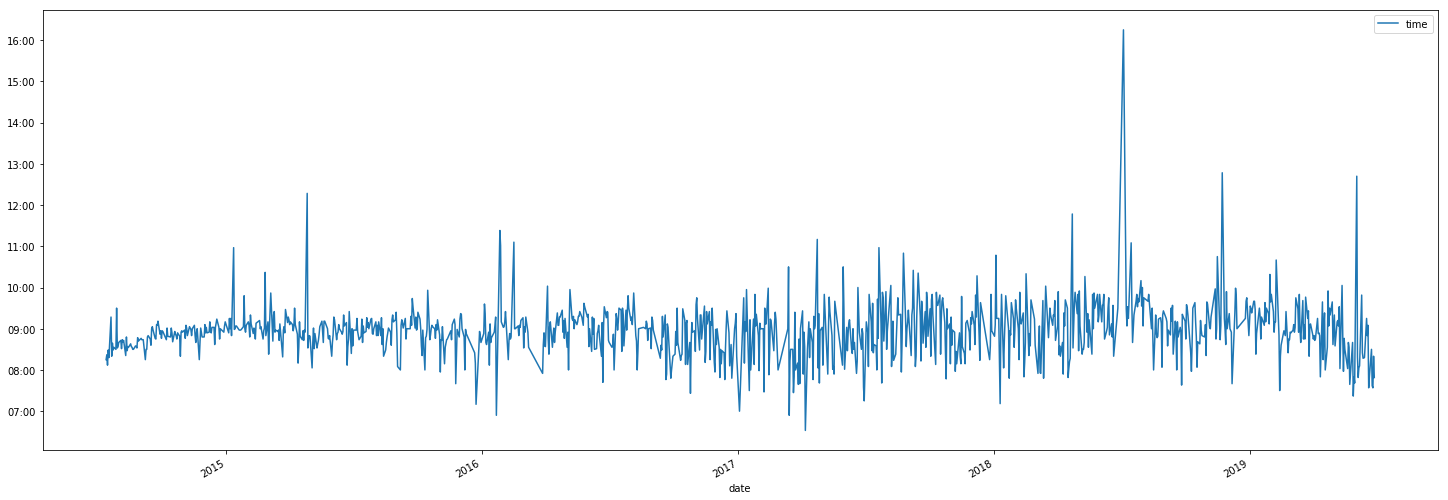

In [55]:
fig = plt.figure(figsize=(25,9))
ax1 = fig.add_subplot(1,1,1)

ax1.yaxis.set_major_formatter(DateFormatter('%H:%M'))

df_cat.plot(x='date', y='time', ax=ax1)

In [ ]:
df_cat['rolling']